<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK
Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

- il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
- De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec <b>Markdown</b>
- d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
pd.set_option('display.max_rows', None)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers</h3>
</div>

In [3]:
#Importation du fichier population.csv
erp = pd.read_excel('Fichier_erp.xlsx')
df_erp = pd.DataFrame(erp)

web = pd.read_excel('Fichier_web.xlsx')
df_web = pd.DataFrame(web)

liaison = pd.read_excel('fichier_liaison.xlsx')
df_liaison = pd.DataFrame(liaison)

C:\Users\damii\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\damii\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\damii\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire et nettoyage des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier erp</h3>
</div>

In [4]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observaztion(s) ou article(s)".format(erp.shape[0]))
print("Le tableau comporte {} colone(s)".format(erp.shape[1]))

Le tableau comporte 825 observaztion(s) ou article(s)
Le tableau comporte 5 colone(s)


In [5]:
#La nature des données dasn chacune des colones
erp.dtypes

#Le nombre de valeurs présentes dans chacune des colonnes
print(erp.count())

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64


In [6]:
#Affichage des stats sur le fichier erp
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [7]:
#produit avec un stock négatif
erp[erp['stock_quantity']<0]

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock


In [8]:
#Produit out of stock avec un stock > 0
erp[erp['stock_quantity']>0].sort_values(by='stock_status', ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status
696,6125,0,14.20,48,outofstock
630,5826,1,41.20,12,outofstock
50,4092,0,47.00,6,outofstock
49,4090,0,73.00,6,outofstock
19,4055,0,86.10,1,outofstock
6,4041,1,32.70,15,instock
568,5693,1,13.00,55,instock
562,5618,1,71.30,31,instock
563,5619,1,71.30,13,instock
564,5628,1,25.00,20,instock


In [9]:
#Produit instock avec un stock à 0
erp[erp['stock_quantity']<=0].sort_values(by='stock_status')

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.00,0,instock
0,3847,1,24.20,0,outofstock
483,5067,1,59.90,0,outofstock
486,5070,1,84.70,0,outofstock
487,5075,1,43.30,0,outofstock
488,5375,1,15.20,0,outofstock
494,5384,1,28.80,0,outofstock
503,5439,1,13.20,0,outofstock
508,5448,1,7.20,0,outofstock
510,5474,1,42.00,0,outofstock


In [10]:
#Affichage des 5 premières lignes du dataframe
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [11]:
#vérifie si des lignes sont null
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [12]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(erp.count())

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64


In [13]:
#Affichage des lignes avec une clé primaire null
print(erp.loc[erp['product_id'].isnull()])

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []


In [14]:
#Vérification si ligne en double
erp.loc[erp.duplicated(subset=None, keep='first') == False].count()

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64

In [15]:
#Vérification si product_id en double
erp.loc[erp.duplicated(subset='product_id', keep='first') == False].count()

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier web</h3>
</div>

In [16]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observaztion(s) ou article(s)".format(web.shape[0]))
print("Le tableau comporte {} colone(s)".format(web.shape[1]))

Le tableau comporte 1513 observaztion(s) ou article(s)
Le tableau comporte 28 colone(s)


In [17]:
print(web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


In [18]:
#La nature des données dans chacune des colones
web.dtypes

#Le nombre de valeurs présentes dans chacune des colonnes
print(web.count())

sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64


In [19]:
#Affichage des stats du fichiers web
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,3.855245,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,7.702346,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [20]:
#Affichage des 5 premières lignes du dataframe
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [21]:
#Affichage des lignes avec une clé primaire null
print(web.loc[web['sku'].isnull()])

      sku  virtual  downloadable  rating_count  average_rating  total_sales  \
1     NaN        0             0             0             NaN          NaN   
17    NaN        0             0             0             NaN          NaN   
82    NaN        0             0             0             NaN          NaN   
97    NaN        0             0             0             NaN          NaN   
121   NaN        0             0             0             NaN          NaN   
126   NaN        0             0             0             NaN          NaN   
131   NaN        0             0             0             NaN          NaN   
143   NaN        0             0             0             NaN          NaN   
193   NaN        0             0             0             NaN          NaN   
225   NaN        0             0             0             NaN          NaN   
247   NaN        0             0             0             NaN          NaN   
260   NaN        0             0             0      

In [22]:
#suppression des lignes complètements vides
web.dropna(subset=['sku', 'tax_status'], how='all', axis=0, inplace = True)

In [23]:
#Affichage des lignes restantes avec un sku null
web.loc[web['sku'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
#Affichage de la forme du fichier web
print("Le tableau comporte {} observaztion(s) ou article(s)".format(web.shape[0]))
print("Le tableau comporte {} colone(s)".format(web.shape[1]))

Le tableau comporte 1430 observaztion(s) ou article(s)
Le tableau comporte 28 colone(s)


In [25]:
#Vérification si ligne en double
web.duplicated(subset=None, keep='first')

0       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71      False
72      False
73    

In [26]:
#clé prmiaire en double
web.duplicated(subset='sku', keep='first')

0       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13       True
14      False
15      False
16      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53       True
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71      False
72      False
73    

In [27]:
print(web)

                      sku  virtual  downloadable  rating_count  \
0                   16004        0             0             0   
2                   15075        0             0             0   
3                   16209        0             0             0   
4                   15763        0             0             0   
5                   13895        0             0             0   
6                   12857        0             0             0   
7                   15740        0             0             0   
8                   14253        0             0             0   
9                   14106        0             0             0   
10                  13996        0             0             0   
11                  16146        0             0             0   
12                  15895        0             0             0   
13                  16209        0             0             0   
14                  15861        0             0             0   
15        

[1430 rows x 28 columns]


In [28]:
web.loc[web['sku'] == 16209]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
13,16209,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [29]:
#suppression des lignes avec sku en double 
#web.drop()

In [30]:
web.loc[web['tax_status'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
7,15740,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-04-25 12:32:17,...,jean-faure-saint-emilion-grand-cru-2015,2020-08-27 11:35:02,2020-08-27 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
8,14253,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-20 15:29:32,...,domaine-huet-vouvray-haut-lieu-sec-2016,2020-07-22 09:55:01,2020-07-22 07:55:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
11,16146,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-10-09 17:08:52,...,chateau-de-la-selve-igp-coteaux-de-lardeche-st...,2020-08-25 15:25:03,2020-08-25 13:25:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
12,15895,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-18 09:23:08,...,clos-du-prieur-terrasses-du-larzac-2018,2020-08-07 16:15:03,2020-08-07 14:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
13,16209,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
14,15861,0,0,0,0.0,1.0,NaN,NaN,2.0,2018-10-31 13:52:29,...,domaine-chambeyron-cote-rotie-angeline-2017,2020-08-25 10:35:02,2020-08-25 08:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
16,15310,0,0,0,0.0,14.0,NaN,NaN,2.0,2018-02-20 10:07:41,...,parce-freres-cotes-roussillon-zoe-rouge-2018,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
18,14372,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 16:03:28,...,alphonse-mellot-sancerre-rouge-la-moussiere-2014,2020-08-27 09:30:05,2020-08-27 07:30:05,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [31]:
web = web.dropna(subset=['tax_status'])

In [32]:
web.dropna(subset=['sku'], inplace = True)

In [33]:
print("Le tableau comporte {} observaztion(s) ou article(s)".format(web.shape[0]))
print("Le tableau comporte {} colone(s)".format(web.shape[1]))

Le tableau comporte 714 observaztion(s) ou article(s)
Le tableau comporte 28 colone(s)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier liaison</h3>
</div>

In [34]:
#Affichage des 5 premières lignes du fichier liaison
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [35]:
print("Le tableau comporte {} observaztion(s) ou article(s)".format(liaison.shape[0]))
print("Le tableau comporte {} colone(s)".format(liaison.shape[1]))

Le tableau comporte 825 observaztion(s) ou article(s)
Le tableau comporte 2 colone(s)


In [36]:
liaison = liaison.rename(columns={'id_web' : 'sku'})

In [37]:
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [38]:
#Vérification si ligne en double dans le fichier de liaison 
liaison.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [39]:
liaison.loc[liaison['sku'].isnull()]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
184,4278,NaN
185,4279,NaN
234,4565,NaN
238,4577,NaN


In [40]:
liaison.dropna(inplace = True)
print(liaison)
liaison.count()

     product_id                  sku
0          3847                15298
1          3849                15296
2          3850                15300
3          4032                19814
4          4039                19815
5          4040                15303
6          4041                14975
7          4042                16042
8          4043                14980
9          4045                16041
10         4046                15269
11         4047                14977
12         4048                16044
13         4049                16043
14         4050                16449
15         4051                16045
16         4052                16030
17         4053                13127
18         4054                19816
20         4056                16029
21         4057                16039
22         4058                16318
23         4059                16275
24         4060                16498
25         4062                16320
26         4063                16319
2

product_id    734
sku           734
dtype: int64

In [41]:
doublons = liaison.drop_duplicates()

In [42]:
doublons.count()

product_id    734
sku           734
dtype: int64

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse de données</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Liens entre les fichiers</h3>
</div>

In [43]:
#left join entre fichier web et le fichier de liaison
merge_web_liaison = pd.merge(web, liaison, how='left', on='sku')
merge_web_liaison.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id
0,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4165
1,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4174
2,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5796
3,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4582
4,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6106


In [44]:
print("Le tableau comporte {} observaztion(s) ou article(s)".format(merge_web_liaison.shape[0]))
print("Le tableau comporte {} colone(s)".format(merge_web_liaison.shape[1]))

Le tableau comporte 714 observaztion(s) ou article(s)
Le tableau comporte 29 colone(s)


In [45]:
#left join entre le dataframe créé avant avec le merge et le dataframe erp
merge_web_erp = pd.merge(merge_web_liaison, erp, how='left',  on='product_id')

In [46]:
# Vérifier les valeurs en double dans la colonne 'sku'
#print(merge_web_liaison.duplicated(subset='sku', keep=False))
print("Le tableau comporte {} observaztion(s) ou article(s)".format(merge_web_erp.shape[0]))
print("Le tableau comporte {} colone(s)".format(merge_web_erp.shape[1]))

Le tableau comporte 714 observaztion(s) ou article(s)
Le tableau comporte 33 colone(s)


In [47]:
doublons_merge = merge_web_erp.drop_duplicates()
print("Le tableau comporte {} observaztion(s) ou article(s)".format(doublons_merge.shape[0]))
print("Le tableau comporte {} colone(s)".format(doublons_merge.shape[1]))

Le tableau comporte 714 observaztion(s) ou article(s)
Le tableau comporte 33 colone(s)


In [48]:
#Affichage du dataframe avec l'ensemble des données
merge_web_erp.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4165,1,12.0,57,instock
1,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4174,1,5.7,94,instock
2,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5796,1,12.5,12,instock
3,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4582,1,109.6,7,instock
4,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6106,1,74.8,15,instock


In [49]:
#Recherche de toutes les lignes mais seulement certaines colonnes
merge_web_erp.loc[:, ['sku', 'product_id', 'total_sales', 'price']]

,sku,product_id,total_sales,price
0,15075,4165,3.0,12.00
1,16209,4174,6.0,5.70
2,13895,5796,0.0,12.50
3,12857,4582,0.0,109.60
4,14106,6106,0.0,74.80
5,13996,6212,2.0,115.00
6,15428,4246,7.0,15.30
7,7033,5756,4.0,42.20
8,16077,6207,37.0,25.20
9,16237,4153,36.0,29.00


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Calcul du chiffre d'affaires</h3>
</div>

In [50]:
#Ajout d'une colonne CA_produit
merge_web_erp['CA_produit'] = merge_web_erp['total_sales'] * merge_web_erp['price']
merge_web_erp.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,CA_produit
0,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,0.0,product,NaN,0.0,4165,1,12.0,57,instock,36.0
1,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,0.0,product,NaN,0.0,4174,1,5.7,94,instock,34.2
2,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,0.0,product,NaN,0.0,5796,1,12.5,12,instock,0.0
3,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,0.0,product,NaN,0.0,4582,1,109.6,7,instock,0.0
4,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,0.0,product,NaN,0.0,6106,1,74.8,15,instock,0.0


In [51]:
merge_web_erp['CA_produit'].describe()

count     714.000000
mean       98.835574
std       307.685071
min         0.000000
25%         0.000000
50%        15.250000
75%        91.150000
max      4704.000000
Name: CA_produit, dtype: float64

In [52]:
#Recherche et affichage de toutes les lignes avec uniquement les colonnes qui nous intéressent
merge_web_erp.loc[:, ['sku', 'product_id', 'total_sales', 'price', 'CA_produit']]

,sku,product_id,total_sales,price,CA_produit
0,15075,4165,3.0,12.00,36.0
1,16209,4174,6.0,5.70,34.2
2,13895,5796,0.0,12.50,0.0
3,12857,4582,0.0,109.60,0.0
4,14106,6106,0.0,74.80,0.0
5,13996,6212,2.0,115.00,230.0
6,15428,4246,7.0,15.30,107.1
7,7033,5756,4.0,42.20,168.8
8,16077,6207,37.0,25.20,932.4
9,16237,4153,36.0,29.00,1044.0


In [53]:
print("Le tableau comporte {} observaztion(s) ou article(s)".format(merge_web_erp.shape[0]))
print("Le tableau comporte {} colone(s)".format(merge_web_erp.shape[1]))

Le tableau comporte 714 observaztion(s) ou article(s)
Le tableau comporte 34 colone(s)


In [54]:
CA_total = merge_web_erp['CA_produit'].sum()
print(CA_total)

70568.6


In [55]:
nb_vente = merge_web_erp['total_sales'].sum()
print(nb_vente)

2865.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Repairer les erreurs</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Vérifier valeurs null</h3>
</div>

In [56]:
print(merge_web_erp.isnull().sum())

sku                        0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
product_id                 0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
CA_produit                 0
dtype: int64


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - Vérifier le type des données</h3>
</div>

In [57]:
print(merge_web_erp.dtypes)

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [58]:
print(merge_web_erp['sku'].dtype)

object


In [59]:
# Filtrer les lignes où la colonne 'sku' n'est pas un entier
non_integers = merge_web_erp.loc[~merge_web_erp['sku'].astype(str).str.isdigit()]

# Afficher les lignes contenant des valeurs non-entières dans la colonne 'sku'
non_integers.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,CA_produit
101,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,0.0,product,NaN,0.0,4954,1,25.0,0,instock,250.0
247,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,0.0,product,NaN,0.0,7247,1,54.8,23,instock,0.0


In [60]:
# Filtrer les lignes où la colonne 'sku' n'est pas un entier
non_integers_product_id = merge_web_erp.loc[~merge_web_erp['product_id'].astype(str).str.isdigit()]

# Afficher les lignes contenant des valeurs non-entières dans la colonne 'sku'
non_integers_product_id.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,CA_produit


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3 - Les outliers</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3.1 - CA produit</h4>
</div>

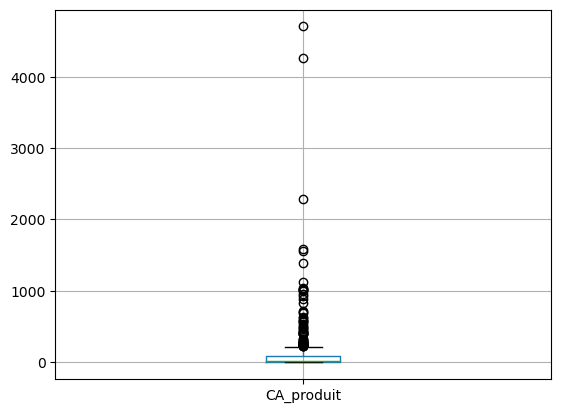

In [82]:
merge_web_erp.boxplot(column = 'CA_produit')
plt.show()

In [62]:
#plt.bar(merge_web_erp['CA_produit'].describe(), bins=inter, rwidth=0.8)

In [81]:
# Calculer Q1 (premier quartile) et Q3 (troisième quartile)
Q1 = merge_web_erp['CA_produit'].quantile(0.25)
Q3 = merge_web_erp['CA_produit'].quantile(0.75)
mediane = merge_web_erp['CA_produit'].median()

# Calculer l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définir les bornes inférieure et supérieure pour détecter les outliers
lower_bound = round(Q1 - 1.5 * IQR, 2)
upper_bound = round(Q3 + 1.5 * IQR, 2)

# Filtrer les outliers
outliers_ca = merge_web_erp[(merge_web_erp['CA_produit'] < lower_bound) | (merge_web_erp['CA_produit'] > upper_bound)][['sku', 'CA_produit', 'price', 'total_sales']]

nb_outliers_ca = outliers_ca['sku'].count()
# Afficher les outliers
print("Borne inférieur : {}".format(lower_bound))
print("Médiane : {}".format(mediane))
print("Borne supérieur : {}".format(upper_bound))
print(outliers_ca)
print("Nombre d'outliers : {}".format(nb_outliers_ca))

Borne inférieur : -136.72
Médiane : 15.25
Borne supérieur : 227.88
                     sku  CA_produit  price  total_sales
5                  13996       230.0  115.0          2.0
8                  16077       932.4   25.2         37.0
9                  16237      1044.0   29.0         36.0
44                 15649       237.6   13.2         18.0
45                 15621       412.3   21.7         19.0
49                 15733       399.0   21.0         19.0
59                 16130       445.5   49.5          9.0
64                 15269       480.0   80.0          6.0
66                   793       249.6   62.4          4.0
84                 13435       440.0   44.0         10.0
92                 16264       414.2   10.9         38.0
101  bon-cadeau-25-euros       250.0   25.0         10.0
104                16210       245.1    5.7         43.0
121                16153       328.0   41.0          8.0
129                16066       698.0   69.8         10.0
132                15

In [64]:
merge_web_erp['CA_produit'].describe()

count     714.000000
mean       98.835574
std       307.685071
min         0.000000
25%         0.000000
50%        15.250000
75%        91.150000
max      4704.000000
Name: CA_produit, dtype: float64

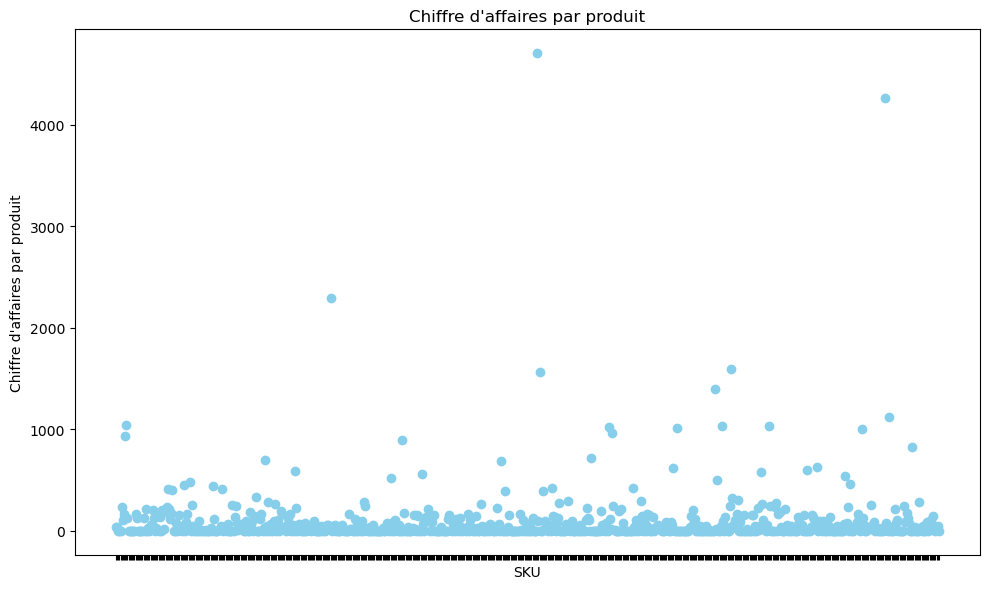

In [65]:
# Assurez-vous que les SKU sont uniques et convertissez-les en une séquence numérique
sku_unique = np.arange(len(merge_web_erp['sku']))

plt.figure(figsize=(10, 6))
plt.scatter(sku_unique, merge_web_erp['CA_produit'], color='skyblue')
plt.xlabel('SKU')
plt.ylabel('Chiffre d\'affaires par produit')
plt.title('Chiffre d\'affaires par produit')
plt.xticks(sku_unique, merge_web_erp['sku'], rotation=45, ha='right')
plt.tick_params(axis='x', labelbottom=False)
plt.tight_layout()
plt.show()



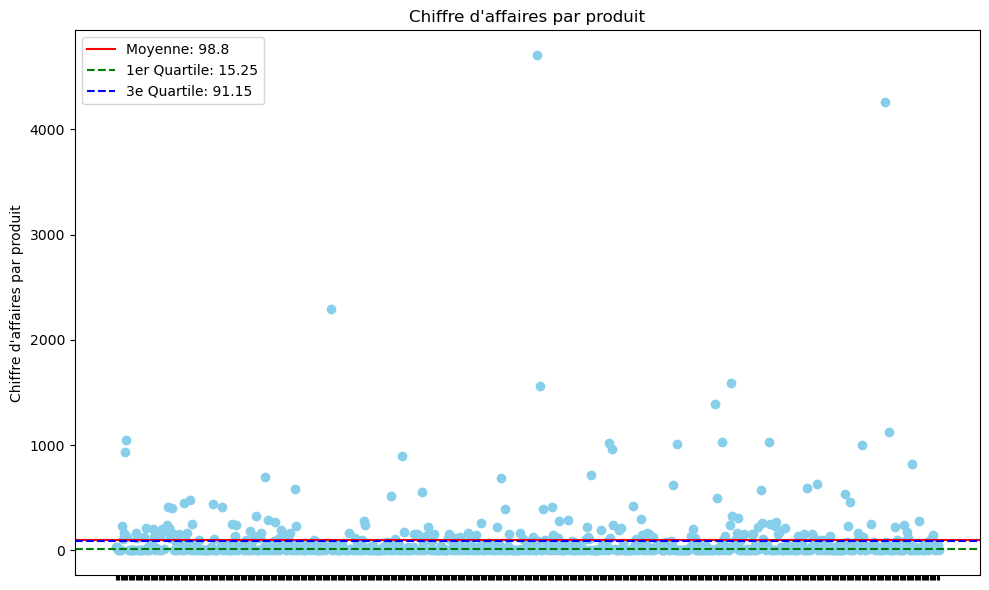

In [66]:
# Génération d'indices numériques pour les SKU pour utilisation sur l'axe des x
sku_indices = np.arange(len(merge_web_erp['sku']))

# Création du nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(sku_indices, merge_web_erp['CA_produit'], color='skyblue')

# Ajout de la moyenne et des quartiles
plt.axhline(y=98.8, color='r', linestyle='-', label='Moyenne: 98.8')
plt.axhline(y=15.25, color='g', linestyle='--', label='1er Quartile: 15.25')
plt.axhline(y=91.15, color='b', linestyle='--', label='3e Quartile: 91.15')

plt.ylabel('Chiffre d\'affaires par produit')
plt.title('Chiffre d\'affaires par produit')

# Configuration des étiquettes de l'axe des x
plt.xticks(sku_indices, merge_web_erp['sku'], rotation=45, ha='right')
plt.tick_params(axis='x', labelbottom=False)

# Ajout de la légende
plt.legend()

plt.tight_layout()  # Ajustement automatique de la disposition du graphe pour éviter les chevauchements
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3.2 - Prix des produits</h4>
</div>

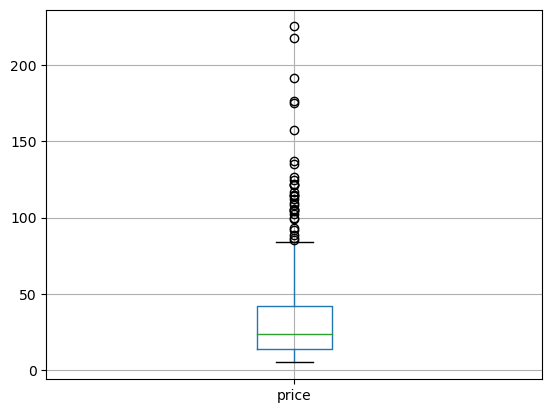

In [67]:
merge_web_erp.boxplot(column = 'price')
plt.show()

In [90]:
pd.options.display.max_colwidth = None
# Calculer Q1 (premier quartile) et Q3 (troisième quartile)
Q1 = merge_web_erp['price'].quantile(0.25)
Q3 = merge_web_erp['price'].quantile(0.75)
mediane = merge_web_erp['price'].median()

# Calculer l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définir les bornes inférieure et supérieure pour détecter les outliers
lower_bound = round(Q1 - 1.5 * IQR, 2)
upper_bound = round(Q3 + 1.5 * IQR, 2)

whisker_low_actual = merge_web_erp['price'][merge_web_erp['price'] >= lower_bound].min()
whisker_high_actual = merge_web_erp['price'][merge_web_erp['price'] <= upper_bound].max()

# Filtrer les outliers
outliers_price = merge_web_erp[(merge_web_erp['price'] < whisker_low_actual) | (merge_web_erp['price'] > whisker_high_actual)][['sku', 'price', 'post_title']]

nb_outliers_price = outliers_price['sku'].count()
# Afficher les outliers
print("Borne inférieur : {}".format(lower_bound))
print("Médiane : {}".format(mediane))
print("Borne supérieur : {}".format(upper_bound))
print("Nombre d'outliers : {}".format(nb_outliers_price))
print(outliers_price['post_title'])

Borne inférieur : -28.01
Médiane : 23.55
Borne supérieur : 84.29
Nombre d'outliers : 32
3                        Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014
5                        Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2015
12        Champagne Agrapart &amp; Fils Minéral Extra Brut Blanc de Blancs Grand Cru 2012
16               Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017
37                                     Domaine Des Croix Corton Grand Cru Les Grèves 2017
102                      Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2014
119                                 Domaine des Comtes Lafon Volnay 1er Cru Champans 2013
152            Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012
177                                                   Camille Giroud Clos de Vougeot 2016
181                     Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2
186         

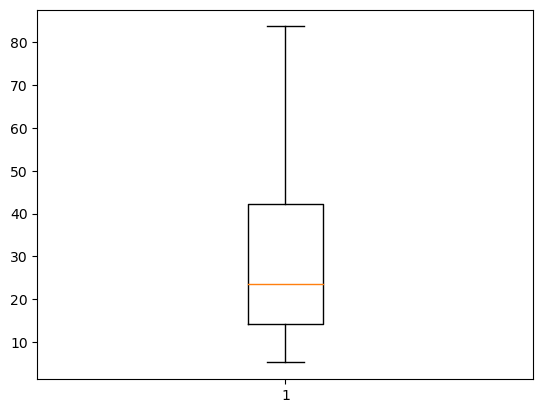

In [91]:
boxplot_data = {
    'whislo': whisker_low_actual,  # Borne inférieure de la moustache
    'q1': Q1,            # Premier quartile
    'med': mediane,      # Médiane
    'q3': Q3,            # Troisième quartile
    'whishi': whisker_high_actual, # Borne supérieure de la moustache
    'fliers': []         # Points aberrants (si existants)
}

# Création du boxplot
fig, ax = plt.subplots()
ax.bxp([boxplot_data], vert=True)  # `vert=False` pour un boxplot horizontal
ax.set_title('')
plt.show()

In [69]:
print(outliers_price)

       sku  price  \
3    12857  109.6   
5    13996  115.0   
12   13913   86.8   
16   15382  100.0   
37   14805  102.3   
102  12791  105.0   
119  11601   99.0   
152  11668   88.4   
177  15185  175.0   
181  14915  124.8   
186   3510  176.0   
187  13914  112.0   
201  15070  121.0   
232  11602  105.0   
239  14775  122.0   
286  14596  105.6   
315  14581  217.5   
334  14220  137.0   
393  15072  121.0   
396  12790  115.0   
405  15126  116.4   
410   3509  104.0   
437  14774   93.0   
464   7819  157.0   
508  14773  114.0   
519  12589  126.5   
541  13853   85.6   
546  19822   92.0   
559  14983  191.3   
572  14923  135.0   
580   3507  108.5   
670  15940  225.0   

                                                                             post_title  
3                      Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014  
5                      Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2015  
12      Champagne Agrapart &amp; Fil

In [70]:
outliers_price.head(50)

,sku,price,post_title
3,12857,109.6,Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014
5,13996,115.0,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2015
12,13913,86.8,Champagne Agrapart &amp; Fils Minéral Extra Brut Blanc de Blancs Grand Cru 2012
16,15382,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017
37,14805,102.3,Domaine Des Croix Corton Grand Cru Les Grèves 2017
102,12791,105.0,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2014
119,11601,99.0,Domaine des Comtes Lafon Volnay 1er Cru Champans 2013
152,11668,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012
177,15185,175.0,Camille Giroud Clos de Vougeot 2016
181,14915,124.8,Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2


In [71]:
print(merge_web_erp['post_title'])

0                                                       Parés Baltà Penedès Indigena 2017
1                                                          Maurel Cabardès Tradition 2017
2                                              Château Saransot-Dupré Bordeaux Blanc 2016
3                        Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014
4                                                     Stéphane Tissot Château-Chalon 2011
5                        Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2015
6                                                    Domaine Saint-Denis Mâcon Lugny 2017
7                                    Huile d'Olive Extra Vierge Planeta Selezione Chef 3L
8                                                Domaine Giudicelli Patrimonio Rouge 2016
9                                        Elian Daros Côtes du Marmandais Clos Baquey 2015
10                                          Clos du Mont-Olivet Côtes-du-Rhône Blanc 2019
11        

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3.3 - Ventes par produit</h4>
</div>

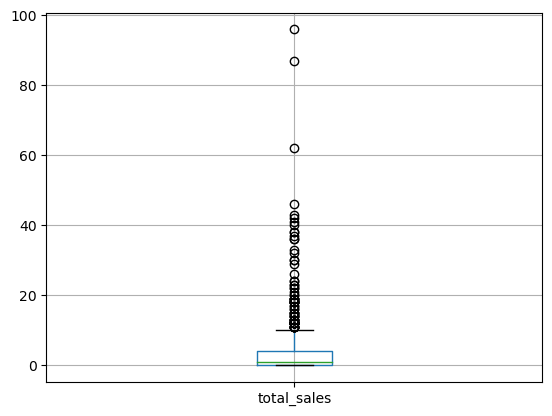

In [72]:
merge_web_erp.boxplot(column = 'total_sales')
plt.show()

In [73]:
# Calculer Q1 (premier quartile) et Q3 (troisième quartile)
Q1 = merge_web_erp['total_sales'].quantile(0.25)
Q3 = merge_web_erp['total_sales'].quantile(0.75)

# Calculer l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définir les bornes inférieure et supérieure pour détecter les outliers
lower_bound = round(Q1 - 1.5 * IQR, 2)
upper_bound = round(Q3 + 1.5 * IQR, 2)

# Filtrer les outliers
outliers_sales = merge_web_erp[(merge_web_erp['total_sales'] < lower_bound) | (merge_web_erp['total_sales'] > upper_bound)][['sku', 'total_sales']]


# Afficher les outliers
print("Borne inférieur : {}".format(lower_bound))
print("Borne supérieur : {}".format(upper_bound))
print(outliers_sales)

Borne inférieur : -6.0
Borne supérieur : 10.0
       sku  total_sales
8    16077         37.0
9    16237         36.0
24   16274         13.0
36   15141         18.0
41   16505         12.0
43   16527         15.0
44   15649         18.0
45   15621         19.0
49   15733         19.0
61   15933         12.0
85   16263         12.0
92   16264         38.0
104  16210         43.0
113  16318         11.0
116  16586         26.0
132  15860         22.0
137  16304         14.0
138  16295         46.0
143  16160         17.0
155  16317         30.0
186   3510         13.0
238  15631         21.0
248  15533         24.0
250  14864         12.0
258  15737         14.0
261  15818         12.0
265  16189         42.0
268  15310         14.0
271  15561         24.0
276  16159         18.0
288  15683         12.0
312  15812         11.0
330  16497         13.0
337  15452         15.0
365   7818         96.0
367    304         40.0
370   8344         18.0
378  15967         20.0
383  16024        